## Part 1: Data Prep

In [1]:
import pandas as pd

In [2]:
msoa_sw_2011 = pd.read_csv('msoa_sw_2011.csv')
msoa_london_2011 = pd.read_csv('msoa_london_2011.csv')

In [3]:
msoa_london_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA11CD  983 non-null    object
 1   MSOA11NM  983 non-null    object
 2   LAD11CD   983 non-null    object
 3   LAD11NM   983 non-null    object
 4   RGN11CD   983 non-null    object
 5   RGN11NM   983 non-null    object
dtypes: object(6)
memory usage: 46.2+ KB


In [4]:
#read in lookup sheet for mosa 2011 and mosa 2001
mosa_01to11=pd.read_csv('MSOA_2001_to_2011.csv')

In [5]:
sw0 = msoa_sw_2011.merge(mosa_01to11, on='MSOA11CD', how='left')
london0 = msoa_london_2011.merge(mosa_01to11, on='MSOA11CD', how='left')

In [6]:
london0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 986
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSOA11CD    987 non-null    object
 1   MSOA11NM_x  987 non-null    object
 2   LAD11CD     987 non-null    object
 3   LAD11NM     987 non-null    object
 4   RGN11CD     987 non-null    object
 5   RGN11NM     987 non-null    object
 6   MSOA01CD    986 non-null    object
 7   MSOA01NM    986 non-null    object
 8   MSOA11NM_y  986 non-null    object
 9   CHGIND      986 non-null    object
dtypes: object(10)
memory usage: 84.8+ KB


In [ ]:
london0.to_csv('london.csv',index=False)

In [7]:
#read in median house price of 2001 and 2011 for all MSOAs
medianprice_2011 = pd.read_csv('median_price_2011.csv')
medianprice_2001 = pd.read_csv('median_price_2001.csv')

In [8]:
#read in median house price of 2001 and 2011 for all local authorities 
medianprice_la = pd.read_csv('medianprice_la.csv')
#read in median house price of 2001 and 2011 for all regions 
medianprice_r = pd.read_csv('medianprice_reigion.csv')

In [9]:
#read in median income of 2001 and 2011 for all local authorities
medianincome_la = pd.read_csv('residence_based_earnings.csv')

In [10]:
#read in median income of 2001 and 2011 for all regions
medianincome_r = pd.read_csv('medianearning_region.csv')

In [11]:
#read in NS-SeC data of 2001 and 2011 for all MSOAs
nssec_2011 = pd.read_csv('NS-SeC_2011.csv')
nssec_2001 = pd.read_csv('NS-SeC_2001.csv')

In [12]:
#read in NS-SeC data of 2001 and 2011 for all local authorities 
nssec_2011_la = pd.read_csv('data01/NS-SeC_2011_la.csv')
nssec_2001_la = pd.read_csv('data01/NS-SeC_2001_la.csv')
#read in NS-SeC data of 2001 and 2011 for all regions 
nssec_2011_r = pd.read_csv('data01/NS-SeC_2011_region.csv')
nssec_2001_r = pd.read_csv('data01/NS-SeC_2001_region.csv')

In [13]:
#read in qualification data of 2001 and 2011 for all MSOAs
qualification_2011 = pd.read_csv('qualification_2011.csv')
qualification_2001 = pd.read_csv('qualification_2001.csv')

In [14]:
#read in qualification data of 2001 and 2011 for all local authorities 
qualification_2011_la = pd.read_csv('data01/Qualifications_2011_la.csv')
qualification_2001_la = pd.read_csv('data01/Qualifications_2001_la.csv')
#read in qualification data of 2001 and 2011 for all regions 
qualification_2011_r = pd.read_csv('data01/Qualifications_2011_region.csv')
qualification_2001_r = pd.read_csv('data01/Qualifications_2001_region.csv')

In [15]:
sw0 = sw0.merge(medianprice_2011, on='MSOA11CD', how='left')
sw0 = sw0.drop(columns=['MSOA11NM_y'])
sw0 = sw0.merge(medianprice_2001, on='MSOA11CD', how='left')
sw0 = sw0.merge(medianprice_la, on='LAD11CD', how='left')
sw0 = sw0.drop(columns=['LAD11NM_y'])
sw0 = sw0.merge(medianprice_r, on='RGN11CD', how='left')
sw0 = sw0.drop(columns=['RGN11NM_y'])
sw0 = sw0.rename (columns={"RGN11NM_x": "RGN11NM", "LAD11NM_x": "LAD11NM", "MSOA11NM_x":"MSOA11NM"})
sw0 = sw0.merge(medianincome_la, on='LAD11CD', how='left')
sw0 = sw0.drop(columns=['LAD11NM_y'])
sw0 = sw0.rename (columns={ "LAD11NM_x": "LAD11NM"})
sw0 = sw0.merge(medianincome_r, on='RGN11NM', how='left')
sw0 = sw0.merge(nssec_2011, on='MSOA11CD', how='left')
sw0 = sw0.merge(nssec_2001, on='MSOA01CD', how='left')
sw0 = sw0.merge(nssec_2011_la, on='LAD11NM', how='left')
sw0 = sw0.merge(nssec_2001_la, on='LAD11NM', how='left')
sw0 = sw0.merge(nssec_2011_r, on='RGN11NM', how='left')
sw0 = sw0.merge(nssec_2001_r, on='RGN11NM', how='left')
sw0 = sw0.merge(qualification_2011, on='MSOA11CD', how='left')
sw0 = sw0.merge(qualification_2001, on='MSOA01CD', how='left')
sw0 = sw0.merge(qualification_2011_la, on='LAD11NM', how='left')
sw0 = sw0.merge(qualification_2001_la, on='LAD11NM', how='left')
sw0 = sw0.merge(qualification_2011_r, on='RGN11NM', how='left')
sw0 = sw0.merge(qualification_2001_r, on='RGN11NM', how='left')

In [17]:
sw0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       246 non-null    object 
 1   MSOA11NM                       246 non-null    object 
 2   LAD11CD                        246 non-null    object 
 3   LAD11NM                        246 non-null    object 
 4   RGN11CD                        246 non-null    object 
 5   RGN11NM                        246 non-null    object 
 6   MSOA01CD                       246 non-null    object 
 7   MSOA01NM                       246 non-null    object 
 8   CHGIND                         246 non-null    object 
 9   median_price_2011              246 non-null    object 
 10  median_price_2001              246 non-null    float64
 11  median_price_2001_la           246 non-null    int64  
 12  median_price_2011_la           246 non-null    int

In [ ]:
#do all the same thing for the London MSOAs

In [18]:
london0 = london0.merge(medianprice_2011, on='MSOA11CD', how='left')
london0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 986
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSOA11CD           987 non-null    object
 1   MSOA11NM_x         987 non-null    object
 2   LAD11CD            987 non-null    object
 3   LAD11NM            987 non-null    object
 4   RGN11CD            987 non-null    object
 5   RGN11NM            987 non-null    object
 6   MSOA01CD           986 non-null    object
 7   MSOA01NM           986 non-null    object
 8   MSOA11NM_y         986 non-null    object
 9   CHGIND             986 non-null    object
 10  median_price_2011  987 non-null    object
dtypes: object(11)
memory usage: 92.5+ KB


In [19]:
london0 = london0.drop(columns=['MSOA11NM_y'])
london0 = london0.merge(medianprice_2001, on='MSOA11CD', how='left')
london0 = london0.merge(medianprice_la, on='LAD11CD', how='left')
london0 = london0.drop(columns=['LAD11NM_y'])
london0 = london0.merge(medianprice_r, on='RGN11CD', how='left')
london0 = london0.drop(columns=['RGN11NM_y'])
london0 = london0.rename (columns={"RGN11NM_x": "RGN11NM", "LAD11NM_x": "LAD11NM", "MSOA11NM_x":"MSOA11NM"})
london0 = london0.merge(medianincome_la, on='LAD11CD', how='left')
london0 = london0.drop(columns=['LAD11NM_y'])
london0 = london0.rename (columns={ "LAD11NM_x": "LAD11NM"})
london0 = london0.merge(medianincome_r, on='RGN11NM', how='left')
london0 = london0.merge(nssec_2011, on='MSOA11CD', how='left')
london0 = london0.merge(nssec_2001, on='MSOA01CD', how='left')
london0 = london0.merge(nssec_2011_la, on='LAD11NM', how='left')
london0 = london0.merge(nssec_2001_la, on='LAD11NM', how='left')
london0 = london0.merge(nssec_2011_r, on='RGN11NM', how='left')
london0 = london0.merge(nssec_2001_r, on='RGN11NM', how='left')
london0 = london0.merge(qualification_2011, on='MSOA11CD', how='left')
london0 = london0.merge(qualification_2001, on='MSOA01CD', how='left')
london0 = london0.merge(qualification_2011_la, on='LAD11NM', how='left')
london0 = london0.merge(qualification_2001_la, on='LAD11NM', how='left')
london0 = london0.merge(qualification_2011_r, on='RGN11NM', how='left')
london0 = london0.merge(qualification_2001_r, on='RGN11NM', how='left')

In [ ]:
london0.info()

In [ ]:
#london0.to_csv('london_merge.csv',index=False)

In [ ]:
#sw0.to_csv('sw.csv',index=False)

In [ ]:
#deal with some issues when engaging with data from the 2001 and 2011 censuses in other places
#read ih the processed datasets 

In [20]:
london=pd.read_csv('london_merge_after_input.csv')
sw = pd.read_csv('sw_merge_after_inout.csv')

In [21]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       245 non-null    object 
 1   MSOA11NM                       245 non-null    object 
 2   LAD11CD                        245 non-null    object 
 3   LAD11NM                        245 non-null    object 
 4   RGN11CD                        245 non-null    object 
 5   RGN11NM                        245 non-null    object 
 6   MSOA01CD                       245 non-null    object 
 7   MSOA01NM                       245 non-null    object 
 8   CHGIND                         245 non-null    object 
 9   median_price_2011              245 non-null    float64
 10  median_price_2001              245 non-null    float64
 11  median_price_2001_la           245 non-null    int64  
 12  median_price_2011_la           245 non-null    int

In [22]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       982 non-null    object 
 1   MSOA11NM                       982 non-null    object 
 2   LAD11CD                        982 non-null    object 
 3   LAD11NM                        982 non-null    object 
 4   RGN11CD                        982 non-null    object 
 5   RGN11NM                        982 non-null    object 
 6   MSOA01CD                       982 non-null    object 
 7   MSOA01NM                       982 non-null    object 
 8   CHGIND                         982 non-null    object 
 9   median_price_2011              982 non-null    float64
 10  median_price_2001              982 non-null    float64
 11  median_price_2001_la           982 non-null    int64  
 12  median_price_2011_la           982 non-null    int

In [23]:
# converting float64 columns which contain integers to int64 for consistency

sw['median_price_2011'] = sw['median_price_2011'].astype('int64')
sw['median_price_2001'] = sw['median_price_2001'].astype('int64')


In [24]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   MSOA11CD                       245 non-null    object
 1   MSOA11NM                       245 non-null    object
 2   LAD11CD                        245 non-null    object
 3   LAD11NM                        245 non-null    object
 4   RGN11CD                        245 non-null    object
 5   RGN11NM                        245 non-null    object
 6   MSOA01CD                       245 non-null    object
 7   MSOA01NM                       245 non-null    object
 8   CHGIND                         245 non-null    object
 9   median_price_2011              245 non-null    int64 
 10  median_price_2001              245 non-null    int64 
 11  median_price_2001_la           245 non-null    int64 
 12  median_price_2011_la           245 non-null    int64 
 13  media

In [25]:
# standardise qualifications and NS-sec values into percentage rates / proportions

sw['qualification_2011_pct'] = (sw['qualification_2011'] / sw['qualification_all_2011'])
sw['qualification_2001_pct'] = (sw['qualification_2001'] / sw['qualification_all_2001']) 

sw['qualification_2011_la_pct'] = (sw['qualification_2011_la'] / sw['qualification_all_2011_la'])
sw['qualification_2001_la_pct'] = (sw['qualification_2001_la'] / sw['qualification_all_2001_la']) 

sw['qualification_2011_region_pct'] = (sw['qualification_2011_region'] / sw['qualification_all_2011_region'])
sw['qualification_2001_region_pct'] = (sw['qualification_2001_region'] / sw['qualification_all_2001_region']) 

sw['NS-SeC_higher_2011_pct'] = (sw['NS-SeC_higher_2011'] / sw['NS-SeC_all_2011']) 
sw['NS-SeC_higher_2001_pct'] = (sw['NS-SeC_higher_2001'] / sw['NS-SeC_all_2001']) 

sw['NS-SeC_higher_2011_la_pct'] = (sw['NS-SeC_higher_2011_la'] / sw['NS-SeC_all_2011_la']) 
sw['NS-SeC_higher_2001_la_pct'] = (sw['NS-SeC_higher_2001_la'] / sw['NS-SeC_all_2001_la']) 

sw['NS-SeC_higher_2011_region_pct'] = (sw['NS-SeC_higher_2011_region'] / sw['NS-SeC_all_2011_region']) 
sw['NS-SeC_higher_2001_region_pct'] = (sw['NS-SeC_higher_2001_region'] / sw['NS-SeC_all_2001_region']) 

In [30]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       245 non-null    object 
 1   MSOA11NM                       245 non-null    object 
 2   LAD11CD                        245 non-null    object 
 3   LAD11NM                        245 non-null    object 
 4   RGN11CD                        245 non-null    object 
 5   RGN11NM                        245 non-null    object 
 6   MSOA01CD                       245 non-null    object 
 7   MSOA01NM                       245 non-null    object 
 8   CHGIND                         245 non-null    object 
 9   median_price_2011              245 non-null    int64  
 10  median_price_2001              245 non-null    int64  
 11  median_price_2001_la           245 non-null    int64  
 12  median_price_2011_la           245 non-null    int

In [ ]:
#do the same for London

In [26]:
# converting float64 columns which contain integers to int64 for consistency

london['median_price_2011'] = london['median_price_2011'].astype('int64')
london['median_price_2001'] = london['median_price_2001'].astype('int64')


In [27]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   MSOA11CD                       982 non-null    object
 1   MSOA11NM                       982 non-null    object
 2   LAD11CD                        982 non-null    object
 3   LAD11NM                        982 non-null    object
 4   RGN11CD                        982 non-null    object
 5   RGN11NM                        982 non-null    object
 6   MSOA01CD                       982 non-null    object
 7   MSOA01NM                       982 non-null    object
 8   CHGIND                         982 non-null    object
 9   median_price_2011              982 non-null    int64 
 10  median_price_2001              982 non-null    int64 
 11  median_price_2001_la           982 non-null    int64 
 12  median_price_2011_la           982 non-null    int64 
 13  media

In [28]:
# standardise qualifications and NS-sec values into percentage rates / proportions

london['qualification_2011_pct'] = (london['qualification_2011'] / london['qualification_all_2011']) 
london['qualification_2001_pct'] = (london['qualification_2001'] / london['qualification_all_2001']) 

london['qualification_2011_la_pct'] = (london['qualification_2011_la'] / london['qualification_all_2011_la'])
london['qualification_2001_la_pct'] = (london['qualification_2001_la'] / london['qualification_all_2001_la']) 

london['qualification_2011_region_pct'] = (london['qualification_2011_region'] / london['qualification_all_2011_region'])
london['qualification_2001_region_pct'] = (london['qualification_2001_region'] / london['qualification_all_2001_region']) 

london['NS-SeC_higher_2011_pct'] = (london['NS-SeC_higher_2011'] / london['NS-SeC_all_2011']) 
london['NS-SeC_higher_2001_pct'] = (london['NS-SeC_higher_2001'] / london['NS-SeC_all_2001']) 

london['NS-SeC_higher_2011_la_pct'] = (london['NS-SeC_higher_2011_la'] / london['NS-SeC_all_2011_la']) 
london['NS-SeC_higher_2001_la_pct'] = (london['NS-SeC_higher_2001_la'] / london['NS-SeC_all_2001_la']) 

london['NS-SeC_higher_2011_region_pct'] = (london['NS-SeC_higher_2011_region'] / london['NS-SeC_all_2011_region']) 
london['NS-SeC_higher_2001_region_pct'] = (london['NS-SeC_higher_2001_region'] / london['NS-SeC_all_2001_region']) 


In [29]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       982 non-null    object 
 1   MSOA11NM                       982 non-null    object 
 2   LAD11CD                        982 non-null    object 
 3   LAD11NM                        982 non-null    object 
 4   RGN11CD                        982 non-null    object 
 5   RGN11NM                        982 non-null    object 
 6   MSOA01CD                       982 non-null    object 
 7   MSOA01NM                       982 non-null    object 
 8   CHGIND                         982 non-null    object 
 9   median_price_2011              982 non-null    int64  
 10  median_price_2001              982 non-null    int64  
 11  median_price_2001_la           982 non-null    int64  
 12  median_price_2011_la           982 non-null    int

In [ ]:
london.to_csv('london_pct.csv',index=False)

## Part 2: further processing-for every varibale of the MSOA, calculate the its relative value to the corresponding Local Authorities and the Region 

In [31]:
# extracting relevant features for further processing 


sw_extract1 = sw[['MSOA11CD',
 'median_price_2011',
 'median_price_2001',
 'median_price_2001_la',
 'median_price_2011_la',
 'median_price_2001_region',
 'median_price_2011_region', 
 'earnings_2003','earnings_2011',
 'earnings_2002_region',
 'earnings_2011_region',
 'qualification_2011_pct',
 'qualification_2001_pct',
 'qualification_2011_la_pct',
 'qualification_2001_la_pct',
 'qualification_2011_region_pct',
 'qualification_2001_region_pct',
 'NS-SeC_higher_2011_pct',
 'NS-SeC_higher_2001_pct',
 'NS-SeC_higher_2011_la_pct',
 'NS-SeC_higher_2001_la_pct',
 'NS-SeC_higher_2011_region_pct',
 'NS-SeC_higher_2001_region_pct']]

In [32]:
sw_extract1['ratio_la_median_price_2011']=(sw_extract1['median_price_2011']/sw_extract1['median_price_2011_la'])
sw_extract1['ratio_la_median_price_2001']=(sw_extract1['median_price_2001']/sw_extract1['median_price_2001_la'])
sw_extract1['ratio_r_median_price_2011']=(sw_extract1['median_price_2011']/sw_extract1['median_price_2011_region'])
sw_extract1['ratio_r_median_price_2001']=(sw_extract1['median_price_2001']/sw_extract1['median_price_2001_region'])
sw_extract1['ratio_la_qualification_2011']=(sw_extract1['qualification_2011_pct']/sw_extract1['qualification_2011_la_pct'])
sw_extract1['ratio_la_qualification_2001']=(sw_extract1['qualification_2001_pct']/sw_extract1['qualification_2001_la_pct'])
sw_extract1['ratio_r_qualification_2011']=(sw_extract1['qualification_2011_pct']/sw_extract1['qualification_2011_region_pct'])
sw_extract1['ratio_r_qualification_2001']=(sw_extract1['qualification_2001_pct']/sw_extract1['qualification_2001_region_pct'])
sw_extract1['ratio_la_NSSEC_2011']=(sw_extract1['NS-SeC_higher_2011_pct']/sw_extract1['NS-SeC_higher_2011_la_pct'])
sw_extract1['ratio_la_NSSEC_2001']=(sw_extract1['NS-SeC_higher_2001_pct']/sw_extract1['NS-SeC_higher_2001_la_pct'])
sw_extract1['ratio_r_NSSEC_2011']=(sw_extract1['NS-SeC_higher_2011_pct']/sw_extract1['NS-SeC_higher_2011_region_pct'])
sw_extract1['ratio_r_NSSEC_2001']=(sw_extract1['NS-SeC_higher_2001_pct']/sw_extract1['NS-SeC_higher_2001_region_pct'])


/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [33]:
sw_extract1['ratio_la_earning_2011']=(sw_extract1['earnings_2011']/sw_extract1['earnings_2011'])
sw_extract1['ratio_la_earning_2001']=(sw_extract1['earnings_2003']/sw_extract1['earnings_2003'])
sw_extract1['ratio_r_earning_2011']=(sw_extract1['earnings_2011']/sw_extract1['earnings_2011_region'])
sw_extract1['ratio_r_earning_2001']=(sw_extract1['earnings_2003']/sw_extract1['earnings_2002_region'])

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [34]:
sw_extract1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MSOA11CD                       245 non-null    object 
 1   median_price_2011              245 non-null    int64  
 2   median_price_2001              245 non-null    int64  
 3   median_price_2001_la           245 non-null    int64  
 4   median_price_2011_la           245 non-null    int64  
 5   median_price_2001_region       245 non-null    int64  
 6   median_price_2011_region       245 non-null    int64  
 7   earnings_2003                  245 non-null    int64  
 8   earnings_2011                  245 non-null    int64  
 9   earnings_2002_region           245 non-null    int64  
 10  earnings_2011_region           245 non-null    int64  
 11  qualification_2011_pct         245 non-null    float64
 12  qualification_2001_pct         245 non-null    flo

In [35]:
sw_extract_la =sw_extract1[['MSOA11CD','ratio_la_median_price_2011','ratio_la_median_price_2001', 'ratio_la_qualification_2011',
                           'ratio_la_qualification_2001','ratio_la_NSSEC_2011','ratio_la_NSSEC_2001',
                           'ratio_la_earning_2011','ratio_la_earning_2001']]
sw_extract_r =sw_extract1[['MSOA11CD','ratio_r_median_price_2011','ratio_r_median_price_2001', 'ratio_r_qualification_2011',
                           'ratio_r_qualification_2001','ratio_r_NSSEC_2011','ratio_r_NSSEC_2001',
                           'ratio_r_earning_2011','ratio_r_earning_2001']]

In [36]:
london_extract1 = london[['MSOA11CD',
 'median_price_2011',
 'median_price_2001',
 'median_price_2001_la',
 'median_price_2011_la',
 'median_price_2001_region',
 'median_price_2011_region', 
 'earnings_2003','earnings_2011',
 'earnings_2002_region',
 'earnings_2011_region',
 'qualification_2011_pct',
 'qualification_2001_pct',
 'qualification_2011_la_pct',
 'qualification_2001_la_pct',
 'qualification_2011_region_pct',
 'qualification_2001_region_pct',
 'NS-SeC_higher_2011_pct',
 'NS-SeC_higher_2001_pct',
 'NS-SeC_higher_2011_la_pct',
 'NS-SeC_higher_2001_la_pct',
 'NS-SeC_higher_2011_region_pct',
 'NS-SeC_higher_2001_region_pct']]

In [37]:
london_extract1['ratio_la_median_price_2011']=(london_extract1['median_price_2011']/london_extract1['median_price_2011_la'])
london_extract1['ratio_la_median_price_2001']=(london_extract1['median_price_2001']/london_extract1['median_price_2001_la'])
london_extract1['ratio_r_median_price_2011']=(london_extract1['median_price_2011']/london_extract1['median_price_2011_region'])
london_extract1['ratio_r_median_price_2001']=(london_extract1['median_price_2001']/london_extract1['median_price_2001_region'])
london_extract1['ratio_la_qualification_2011']=(london_extract1['qualification_2011_pct']/london_extract1['qualification_2011_la_pct'])
london_extract1['ratio_la_qualification_2001']=(london_extract1['qualification_2001_pct']/london_extract1['qualification_2001_la_pct'])
london_extract1['ratio_r_qualification_2011']=(london_extract1['qualification_2011_pct']/london_extract1['qualification_2011_region_pct'])
london_extract1['ratio_r_qualification_2001']=(london_extract1['qualification_2001_pct']/london_extract1['qualification_2001_region_pct'])
london_extract1['ratio_la_NSSEC_2011']=(london_extract1['NS-SeC_higher_2011_pct']/london_extract1['NS-SeC_higher_2011_la_pct'])
london_extract1['ratio_la_NSSEC_2001']=(london_extract1['NS-SeC_higher_2001_pct']/london_extract1['NS-SeC_higher_2001_la_pct'])
london_extract1['ratio_r_NSSEC_2011']=(london_extract1['NS-SeC_higher_2011_pct']/london_extract1['NS-SeC_higher_2011_region_pct'])
london_extract1['ratio_r_NSSEC_2001']=(london_extract1['NS-SeC_higher_2001_pct']/london_extract1['NS-SeC_higher_2001_region_pct'])
london_extract1['ratio_la_earning_2011']=(london_extract1['earnings_2011']/london_extract1['earnings_2011'])
london_extract1['ratio_la_earning_2001']=(london_extract1['earnings_2003']/london_extract1['earnings_2003'])
london_extract1['ratio_r_earning_2011']=(london_extract1['earnings_2011']/london_extract1['earnings_2011_region'])
london_extract1['ratio_r_earning_2001']=(london_extract1['earnings_2003']/london_extract1['earnings_2002_region'])

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [38]:
london_extract_la =london_extract1[['MSOA11CD','ratio_la_median_price_2011','ratio_la_median_price_2001', 'ratio_la_qualification_2011',
                           'ratio_la_qualification_2001','ratio_la_NSSEC_2011','ratio_la_NSSEC_2001',
                           'ratio_la_earning_2011','ratio_la_earning_2001']]
london_extract_r =london_extract1[['MSOA11CD','ratio_r_median_price_2011','ratio_r_median_price_2001', 'ratio_r_qualification_2011',
                           'ratio_r_qualification_2001','ratio_r_NSSEC_2011','ratio_r_NSSEC_2001',
                           'ratio_r_earning_2011','ratio_r_earning_2001']]

In [39]:
london_extract_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     982 non-null    object 
 1   ratio_la_median_price_2011   982 non-null    float64
 2   ratio_la_median_price_2001   982 non-null    float64
 3   ratio_la_qualification_2011  982 non-null    float64
 4   ratio_la_qualification_2001  982 non-null    float64
 5   ratio_la_NSSEC_2011          982 non-null    float64
 6   ratio_la_NSSEC_2001          982 non-null    float64
 7   ratio_la_earning_2011        982 non-null    float64
 8   ratio_la_earning_2001        982 non-null    float64
dtypes: float64(8), object(1)
memory usage: 69.2+ KB


## Part 3: Checking the distribution of the variables; decide which relative scale to use, LA or Region

In the next cell, I create the two complete datasets for the following analysis. Both of them covering all the SW and London MSOAs. In frames_r, every variable's value is the ratio of the MSOA level to the region level. In frmes_la, every variable's value is the ratio of the MSOA level to the LA level.


In [40]:
frames_r = [sw_extract_r, london_extract_r]
swandlondon_r = pd.concat(frames_r)

frames_la = [sw_extract_la, london_extract_la]
swandlondon_la = pd.concat(frames_la)


In [41]:
swandlondon_la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 981
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1227 non-null   object 
 1   ratio_la_median_price_2011   1227 non-null   float64
 2   ratio_la_median_price_2001   1227 non-null   float64
 3   ratio_la_qualification_2011  1227 non-null   float64
 4   ratio_la_qualification_2001  1227 non-null   float64
 5   ratio_la_NSSEC_2011          1227 non-null   float64
 6   ratio_la_NSSEC_2001          1227 non-null   float64
 7   ratio_la_earning_2011        1227 non-null   float64
 8   ratio_la_earning_2001        1227 non-null   float64
dtypes: float64(8), object(1)
memory usage: 95.9+ KB


In [42]:
# check the distribution of feature columns (excluding MSOA code)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

swandlondon_extract__distribution_r = swandlondon_r[[ 'ratio_r_median_price_2011',
 'ratio_r_median_price_2001',
 'ratio_r_qualification_2011',
 'ratio_r_qualification_2001',
 'ratio_r_NSSEC_2011',
 'ratio_r_NSSEC_2001',
 'ratio_r_earning_2011',
 'ratio_r_earning_2001']]

swandlondon_extract__distribution_la = swandlondon_la[[ 'ratio_la_median_price_2011',
 'ratio_la_median_price_2001',
 'ratio_la_qualification_2011',
 'ratio_la_qualification_2001',
 'ratio_la_NSSEC_2011',
 'ratio_la_NSSEC_2001',
 'ratio_la_earning_2011',
 'ratio_la_earning_2001']]


[Text(0, 0, 'ratio_r_median_price_2011'),
 Text(1, 0, 'ratio_r_median_price_2001'),
 Text(2, 0, 'ratio_r_qualification_2011'),
 Text(3, 0, 'ratio_r_qualification_2001'),
 Text(4, 0, 'ratio_r_NSSEC_2011'),
 Text(5, 0, 'ratio_r_NSSEC_2001'),
 Text(6, 0, 'ratio_r_earning_2011'),
 Text(7, 0, 'ratio_r_earning_2001')]

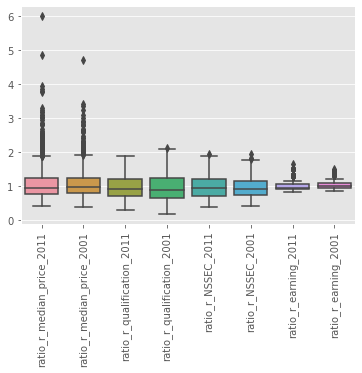

In [43]:
import seaborn as sns
ax = sns.boxplot( data=swandlondon_extract__distribution_r)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'ratio_la_median_price_2011'),
 Text(1, 0, 'ratio_la_median_price_2001'),
 Text(2, 0, 'ratio_la_qualification_2011'),
 Text(3, 0, 'ratio_la_qualification_2001'),
 Text(4, 0, 'ratio_la_NSSEC_2011'),
 Text(5, 0, 'ratio_la_NSSEC_2001'),
 Text(6, 0, 'ratio_la_earning_2011'),
 Text(7, 0, 'ratio_la_earning_2001')]

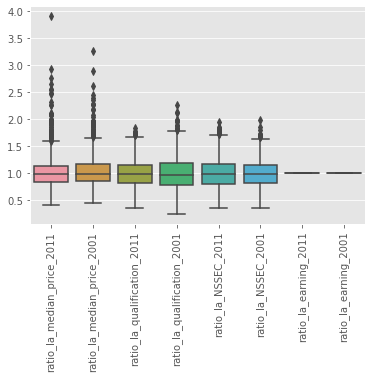

In [44]:
ax = sns.boxplot( data=swandlondon_extract__distribution_la)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot:>

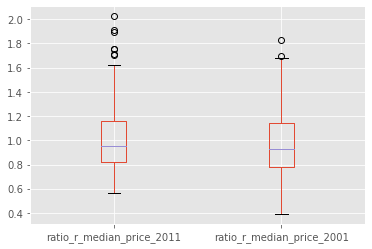

In [45]:
sw_extract_r[['ratio_r_median_price_2011',
 'ratio_r_median_price_2001']].boxplot()

<AxesSubplot:>

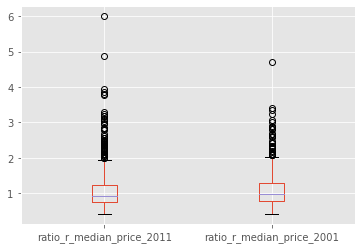

In [46]:
london_extract_r[['ratio_r_median_price_2011',
 'ratio_r_median_price_2001']].boxplot()

<AxesSubplot:>

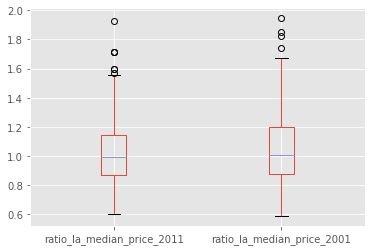

In [47]:
sw_extract_la[['ratio_la_median_price_2011',
 'ratio_la_median_price_2001']].boxplot()

<AxesSubplot:>

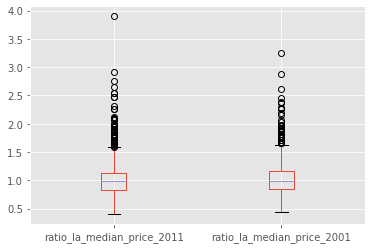

In [48]:
london_extract_la[['ratio_la_median_price_2011',
 'ratio_la_median_price_2001']].boxplot()

### Based on the boxplots above, it seems that using LA as the scale to compare SW and London would better even the regional difference especilly regading to the housing price

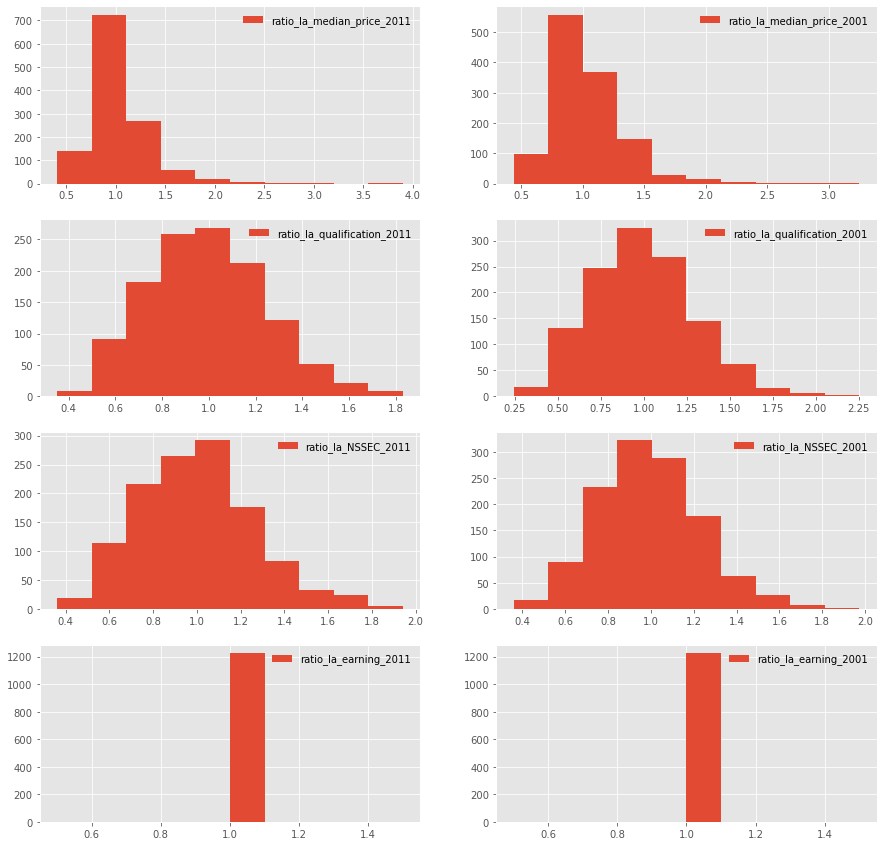

In [49]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract__distribution_la.columns):

            ax.hist(swandlondon_extract__distribution_la[swandlondon_extract__distribution_la.columns[counter]], label='{}'.format(swandlondon_extract__distribution_la.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

#plt.savefig('histogram_all_scoring_var.png', dpi = 200)
plt.show()

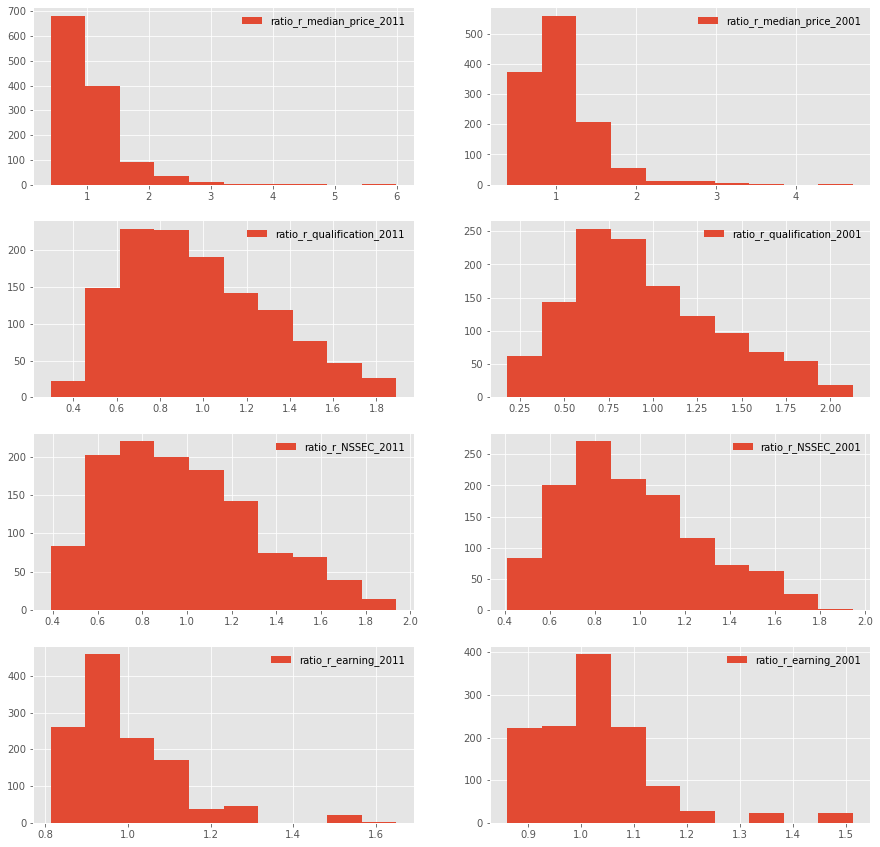

In [51]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract__distribution_r.columns):

            ax.hist(swandlondon_extract__distribution_r[swandlondon_extract__distribution_r.columns[counter]], label='{}'.format(swandlondon_extract__distribution_r.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

#plt.savefig('histogram_all_scoring_var.png', dpi = 200)
plt.show()

### based on the analysis above, I decided to use 'the MSOA to Local Authotity ratio of every variable' as the predictors. 

## Part4: Data Transformation, scaling and PCA


What did I do in this part:

1. Transform highly skewed variable. Consider which transformation approaches to use: untransformed, Box Cox or Log
2. Consider whether to scale the input varibales before PCA. 

three approaches * (to scale or not sclae) = 6 scenarios

Check the explained variance of the 1st componet for the 6scenarios



In [52]:
# from the distribution check above, the median housing price
df_transformed = swandlondon_extract__distribution_la [[ 'ratio_la_median_price_2011',
 'ratio_la_median_price_2001']]

In [53]:
from scipy.stats import boxcox
import numpy as np

In [54]:
#Box-Cox Transform
price01, lmd01a = boxcox(df_transformed['ratio_la_median_price_2001']) 
price11 = boxcox(df_transformed['ratio_la_median_price_2011'], lmbda=lmd01a)

In [55]:
#Log transform
price01l = np.log(df_transformed['ratio_la_median_price_2001']) 
price11l = np.log(df_transformed['ratio_la_median_price_2011'])


In [56]:
#choose one
to_use = 'Box-Cox' # Choices: ['Untransformed','Box-Cox','Log']

In [57]:
if to_use == 'Untransformed':
    swandlondon_la_pca=swandlondon_la
elif to_use == 'Box-Cox':
    swandlondon_la_pca=swandlondon_la
    swandlondon_la_pca['ratio_la_median_price_2011']=price11
    swandlondon_la_pca['ratio_la_median_price_2001']=price01
elif to_use == 'Log':
    swandlondon_la_pca=swandlondon_la
    swandlondon_la_pca['ratio_la_median_price_2011']=price11l
    swandlondon_la_pca['ratio_la_median_price_2001']=price01l 

In [58]:
# import necessary libraries for PCA

from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection


df_scaling = swandlondon_la_pca.set_index('MSOA11CD')

In [59]:
# check that index has been changed to MSOA code

df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, E02003134 to E02006791
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ratio_la_median_price_2011   1227 non-null   float64
 1   ratio_la_median_price_2001   1227 non-null   float64
 2   ratio_la_qualification_2011  1227 non-null   float64
 3   ratio_la_qualification_2001  1227 non-null   float64
 4   ratio_la_NSSEC_2011          1227 non-null   float64
 5   ratio_la_NSSEC_2001          1227 non-null   float64
 6   ratio_la_earning_2011        1227 non-null   float64
 7   ratio_la_earning_2001        1227 non-null   float64
dtypes: float64(8)
memory usage: 86.3+ KB


In [60]:
# split 2001 data from 2011 data

df_scaling_2001 = df_scaling[["ratio_la_median_price_2001", "ratio_la_qualification_2001", "ratio_la_NSSEC_2001","ratio_la_earning_2001"]]
df_scaling_2011 = df_scaling[["ratio_la_median_price_2011", "ratio_la_qualification_2011", "ratio_la_NSSEC_2011","ratio_la_earning_2011"]]

In [61]:
# stacking the 2001 data vertically with 2011 data

values_2001 = df_scaling_2001.values
values_2011 = df_scaling_2011.values
stacked_df = np.concatenate((values_2001, values_2011), axis=0)

In [62]:
df_scaling_2001.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, E02003134 to E02006791
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ratio_la_median_price_2001   1227 non-null   float64
 1   ratio_la_qualification_2001  1227 non-null   float64
 2   ratio_la_NSSEC_2001          1227 non-null   float64
 3   ratio_la_earning_2001        1227 non-null   float64
dtypes: float64(4)
memory usage: 47.9+ KB


In [63]:
# checking for NaN values before scaling and transforming

np.isnan(stacked_df).sum()

0

In [64]:
# scaling and transforming the stacked data using RobustScaler

Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)
Robust_transformer_df

array([[-0.79525522, -1.38512143, -1.19758761,  0.        ],
       [-1.10189401, -0.99173503,  0.00431122,  0.        ],
       [ 1.01572608,  0.15533586,  0.45766028,  0.        ],
       ...,
       [-0.25770493, -0.52482431, -0.57091786,  0.        ],
       [ 0.50687362, -0.54943387, -0.247191  ,  0.        ],
       [ 1.31908053,  1.38371648,  1.92202951,  0.        ]])

In [65]:
# extracting scaled data for 2001

scaled_df_2001 = pd.DataFrame(Robust_transformer_df[0:len(df_scaling_2001),], index=df_scaling_2001.index, columns=list(df_scaling_2001.columns))
scaled_df_2001

,ratio_la_median_price_2001,ratio_la_qualification_2001,ratio_la_NSSEC_2001,ratio_la_earning_2001
MSOA11CD,,,,
E02003134,-0.795255,-1.385121,-1.197588,0.0
E02003135,-1.101894,-0.991735,0.004311,0.0
E02003136,1.015726,0.155336,0.457660,0.0
E02003137,1.209701,3.121535,2.009396,0.0
E02003138,0.732926,2.733818,1.798440,0.0
...,...,...,...,...
E02006786,-0.625399,-1.046126,-0.551177,0.0
E02006787,0.272899,0.066038,0.204620,0.0
E02006788,-0.000526,-0.606965,-0.406371,0.0


In [66]:
scaled_df_2001 = pd.DataFrame(Robust_transformer_df[0:len(df_scaling_2001),], index=df_scaling_2001.index, columns=list(df_scaling_2001.columns))
scaled_df_2001

,ratio_la_median_price_2001,ratio_la_qualification_2001,ratio_la_NSSEC_2001,ratio_la_earning_2001
MSOA11CD,,,,
E02003134,-0.795255,-1.385121,-1.197588,0.0
E02003135,-1.101894,-0.991735,0.004311,0.0
E02003136,1.015726,0.155336,0.457660,0.0
E02003137,1.209701,3.121535,2.009396,0.0
E02003138,0.732926,2.733818,1.798440,0.0
...,...,...,...,...
E02006786,-0.625399,-1.046126,-0.551177,0.0
E02006787,0.272899,0.066038,0.204620,0.0
E02006788,-0.000526,-0.606965,-0.406371,0.0


<AxesSubplot:>

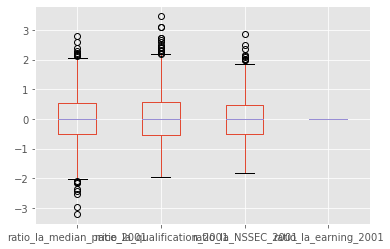

In [67]:
# visualising scaled data using boxplot (2001)

scaled_df_2001.boxplot()

# to output high-resolution image - uncomment the next line
# plt.savefig('scaled_df_2001.png', dpi = 100)

<AxesSubplot:>

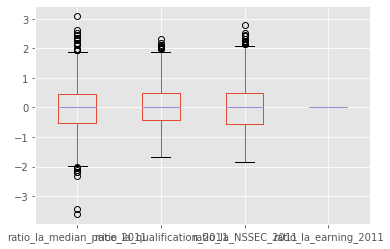

In [68]:
# extracting scaled data for 2011

scaled_df_2011 = pd.DataFrame(Robust_transformer_df[len(df_scaling_2011):,], index=df_scaling_2011.index, columns=list(df_scaling_2011.columns))
scaled_df_2011
# visualising scaled data using boxplot (2011)


scaled_df_2011.boxplot()

# to output high-resolution image - uncomment the next line
# plt.savefig('scaled_df_2011.png', dpi = 100)

In [69]:
# carry out PCA to derive only the 1st principal component---scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_scores = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.82400


In [70]:
# what if one wanted to find all principal components?

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.82400457 0.14168576 0.03430967 0.        ]


In [71]:
# carry out PCA to derive only the 1st principal component----not scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(stacked_df)                      
PCA_scores = pd.DataFrame(pca.transform(stacked_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.83157


In [72]:
# what if one wanted to find all principal components?

pca_all = decomposition.PCA()             
pca_all.fit(stacked_df)                      
print(pca_all.explained_variance_ratio_)

[0.83156641 0.13225879 0.0361748  0.        ]


### The results of this part are as follow:

Explained variances for each scenarios:

1. Untransformed, Scaled:0.79012
2. Untransformed, Not Scaled:0.79363
3. Box-Cox Transformed, Scaled:0.82071
4. Box-Cox Transformed, Not Scaled:0.82869 (Best Performance)
5. Log Transformed, Scaled:0.81630
6. Log Transformed, Not Scaled:0.82457

### Therefore, I decided to use the results of the Box-Cox Transformed and Not Scaled data.

## Part 5: PCA Score

In [73]:
# extracting scores for the respective years

PCA_2001 = pd.DataFrame(PCA_scores.iloc[0:len(df_scaling_2001),])
PCA_2011 = pd.DataFrame(PCA_scores.iloc[len(df_scaling_2011):,])

In [74]:
# renaming their column titles

PCA_2001 = PCA_2001.rename(columns={0: "Score_2001"})
PCA_2011 = PCA_2011.rename(columns={0: "Score_2011"})

In [75]:
# attaching the 2001 scores to their respective MSOAs in the main dataframe (df_score)

df_score = df_scaling.reset_index()
df_score["Score_2001"] = PCA_2001[:]

In [76]:
# PCA_2011 requires further resetting of the index propr to attaching them to the main dataframe

PCA_2011 = PCA_2011.reset_index()
PCA_2011 = PCA_2011.drop(columns="index")
df_score["Score_2011"] = PCA_2011

In [77]:
# view main dataframe

df_score

,MSOA11CD,ratio_la_median_price_2011,ratio_la_median_price_2001,ratio_la_qualification_2011,ratio_la_qualification_2001,ratio_la_NSSEC_2011,ratio_la_NSSEC_2001,ratio_la_earning_2011,ratio_la_earning_2001,Score_2001,Score_2011
0,E02003134,-0.305638,-0.268875,0.523025,0.461860,0.655101,0.579209,1.0,1.0,-0.709548,-0.645002
1,E02003135,-0.327716,-0.366467,0.623575,0.607239,0.781860,0.991289,1.0,1.0,-0.425175,-0.518281
2,E02003136,0.166182,0.307495,1.068613,1.031148,1.275087,1.146724,1.0,1.0,0.275116,0.302558
3,E02003137,0.399040,0.369231,1.746879,2.127330,1.743479,1.678748,1.0,1.0,1.310521,1.123651
4,E02003138,0.200208,0.217490,1.756318,1.984046,1.615324,1.606420,1.0,1.0,1.100737,0.953547
...,...,...,...,...,...,...,...,...,...,...,...
1222,E02006786,-0.396573,-0.214816,0.734698,0.587138,0.739559,0.800836,1.0,1.0,-0.472904,-0.507927
1223,E02006787,0.130967,0.071080,1.077752,0.998147,1.099335,1.059967,1.0,1.0,0.083517,0.187215
1224,E02006788,-0.097792,-0.015941,0.779789,0.749433,0.794068,0.850484,1.0,1.0,-0.240566,-0.296042
1225,E02006789,0.145546,0.180553,0.770695,0.739173,0.905060,0.931110,1.0,1.0,-0.100090,-0.113251


In [78]:
df_score.to_csv('df_score.csv',index=False)

## Part 6: Determine Neighbourhood States by Analysing their Composite Index scores / ranks----same as Yee's approach

In [79]:
# assigning ranks to LSOA based on their 2001 & 2011 scores

df_score["Rank_2001"] = df_score["Score_2001"].rank(ascending=False)
df_score["Rank_2011"] = df_score["Score_2011"].rank(ascending=False)

In [80]:
df_score.head()

,MSOA11CD,ratio_la_median_price_2011,ratio_la_median_price_2001,ratio_la_qualification_2011,ratio_la_qualification_2001,ratio_la_NSSEC_2011,ratio_la_NSSEC_2001,ratio_la_earning_2011,ratio_la_earning_2001,Score_2001,Score_2011,Rank_2001,Rank_2011
0,E02003134,-0.305638,-0.268875,0.523025,0.461860,0.655101,0.579209,1.0,1.0,-0.709548,-0.645002,1187.0,1167.0
1,E02003135,-0.327716,-0.366467,0.623575,0.607239,0.781860,0.991289,1.0,1.0,-0.425175,-0.518281,1047.0,1101.0
2,E02003136,0.166182,0.307495,1.068613,1.031148,1.275087,1.146724,1.0,1.0,0.275116,0.302558,297.0,256.0
3,E02003137,0.399040,0.369231,1.746879,2.127330,1.743479,1.678748,1.0,1.0,1.310521,1.123651,3.0,6.0
4,E02003138,0.200208,0.217490,1.756318,1.984046,1.615324,1.606420,1.0,1.0,1.100737,0.953547,8.0,22.0


In [81]:
# quantifying the change in LSOA's ranks between the 2 years

df_score["Rank_chg"] = df_score["Rank_2001"] - df_score["Rank_2011"]

In [82]:
# descriptive stats of rank changes

df_score["Rank_chg"].describe()

count    1227.000000
mean        0.000000
std       100.481337
min      -540.000000
25%       -52.500000
50%         0.000000
75%        53.000000
max       870.000000
Name: Rank_chg, dtype: float64

<AxesSubplot:>

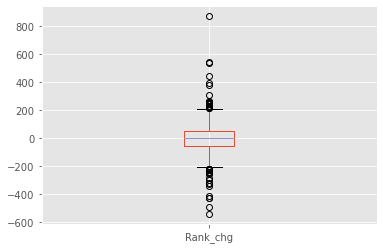

In [83]:
df_score[["Rank_chg"]].boxplot()

In [84]:
# compute z-scores of rank changes

from scipy.stats import zscore

df_score["Z_score"] = df_score[["Rank_chg"]].apply(zscore)

In [85]:
# as a supplementart approach - changes in LSOAs' scores are computed

df_score["score_chg"]= df_score["Score_2011"] - df_score["Score_2001"]

In [86]:
# descriptive stats of rank changes

df_score["score_chg"].describe()

count    1227.000000
mean       -0.003012
std         0.115567
min        -0.545504
25%        -0.070782
50%        -0.001025
75%         0.069135
max         0.868136
Name: score_chg, dtype: float64

<AxesSubplot:>

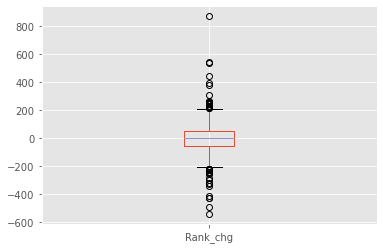

In [87]:
df_score[["Rank_chg"]].boxplot()

In [88]:
# checking the top and bottom 5th percentile benchmarks for score changes

print(df_score["score_chg"].quantile(0.95))
print(df_score["score_chg"].quantile(0.15))

0.17378530239925907
-0.10823143467191611


In [89]:
# assign LSOA status based on: 
# (1) z-scores of rank changes (z<-1 signify that n'hood is in decline (DEC), -1<z<1 signifies that n'hood is stable (STB), z>1 signifies that n'hood is in ascension (ASC))
# (2) changes in LSOAs' scores are within the top or bottom 5th percentile (top 5th percentile: 'ASC' and bottom 5th percentile: 'DEC')

df_score["status"] = "STB"

for i in range(len(df_score)):
    if df_score["Z_score"][i] > 1 or df_score["score_chg"][i] > df_score["score_chg"].quantile(0.95):
        df_score["status"][i] = "ASC"
    elif df_score["Z_score"][i] < -1 or df_score["score_chg"][i] < df_score["score_chg"].quantile(0.05):
        df_score["status"][i] = "DEC"

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [90]:
# check dataframe

df_score

,MSOA11CD,ratio_la_median_price_2011,ratio_la_median_price_2001,ratio_la_qualification_2011,ratio_la_qualification_2001,ratio_la_NSSEC_2011,ratio_la_NSSEC_2001,ratio_la_earning_2011,ratio_la_earning_2001,Score_2001,Score_2011,Rank_2001,Rank_2011,Rank_chg,Z_score,score_chg,status
0,E02003134,-0.305638,-0.268875,0.523025,0.461860,0.655101,0.579209,1.0,1.0,-0.709548,-0.645002,1187.0,1167.0,20.0,0.199123,0.064546,STB
1,E02003135,-0.327716,-0.366467,0.623575,0.607239,0.781860,0.991289,1.0,1.0,-0.425175,-0.518281,1047.0,1101.0,-54.0,-0.537632,-0.093107,STB
2,E02003136,0.166182,0.307495,1.068613,1.031148,1.275087,1.146724,1.0,1.0,0.275116,0.302558,297.0,256.0,41.0,0.408202,0.027442,STB
3,E02003137,0.399040,0.369231,1.746879,2.127330,1.743479,1.678748,1.0,1.0,1.310521,1.123651,3.0,6.0,-3.0,-0.029868,-0.186870,DEC
4,E02003138,0.200208,0.217490,1.756318,1.984046,1.615324,1.606420,1.0,1.0,1.100737,0.953547,8.0,22.0,-14.0,-0.139386,-0.147190,STB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,E02006786,-0.396573,-0.214816,0.734698,0.587138,0.739559,0.800836,1.0,1.0,-0.472904,-0.507927,1074.0,1097.0,-23.0,-0.228992,-0.035023,STB
1223,E02006787,0.130967,0.071080,1.077752,0.998147,1.099335,1.059967,1.0,1.0,0.083517,0.187215,507.0,395.0,112.0,1.115089,0.103698,ASC
1224,E02006788,-0.097792,-0.015941,0.779789,0.749433,0.794068,0.850484,1.0,1.0,-0.240566,-0.296042,869.0,912.0,-43.0,-0.428115,-0.055476,STB
1225,E02006789,0.145546,0.180553,0.770695,0.739173,0.905060,0.931110,1.0,1.0,-0.100090,-0.113251,714.0,727.0,-13.0,-0.129430,-0.013161,STB


In [91]:
# size of different LSOA status groups

df_score.groupby(df_score["status"]).size()

status
ASC    149
DEC    159
STB    919
dtype: int64

In [92]:
# output to file
df_score.to_csv('score_analysis_new.csv')

In [ ]:
#mapping

![alt text](LONDON-RESULTS.png "Title")

![alt text](SW-RESULTS.png "Title")